In [ ]:
#빅데이터_분석&시각화 #미니실습,

# 텍스트 마이닝,
#
# 감성 분석
#
# 1. 모델을 새로운 학습 아니라, 학습된 모델을 불러와서, 활용하기.
#
# 2. 임의로 입력된 문장을 긍정, 부정 분류 작업
#
# 3. 뉴스, 블로그, 네이버 API 이용해서 데이터를 추출.
#
# 4. 긍정 뉴스, 부정 뉴스 , 상위 15개 시각화,
#
# 5. LDA 시각화, 토픽 4개 추출, 토픽 마다 특정 단어들이 높은 확률로
# 등장하는 부분 시각화,

In [41]:
import pickle
from konlpy.tag import Okt
okt = Okt()

def okt_tokenizer(text):
  tokens = okt.morphs(text)
  return tokens

In [42]:
tfidf_model_save_path = "./tfidf_model.pkl"
with open(tfidf_model_save_path, "rb") as file:
    tfidf = pickle.load(file)

print("✅ TF-IDF 모델 불러오기 완료")

✅ TF-IDF 모델 불러오기 완료


In [43]:
model_save_path = "./SA_lr_best.pkl"
with open(model_save_path, "rb") as file:
    SA_lr_best = pickle.load(file)

print("✅ 모델 불러오기 완료")

✅ 모델 불러오기 완료


In [44]:
st = input("감성 분석하기위한 문장을 입력 해주세요: ")

In [45]:
import re

st = re.compile(r"[ㄱ - | 가-힣]+").findall(st)
print(st)
st = [" ".join(st)]
print(st)

['오늘은 운동하러 가기 좋은 날']
['오늘은 운동하러 가기 좋은 날']


In [46]:
st_tfidf = tfidf.transform(st)

In [47]:
st_predict = SA_lr_best.predict(st_tfidf)

In [48]:
if(st_predict == 0):
  print(st," -> 부정")
else:
  print(st," -> 긍정")

['오늘은 운동하러 가기 좋은 날']  -> 긍정


In [73]:
import requests
import json
import time

# 네이버 API 클라이언트 정보 입력 (네이버 개발자 센터에서 발급받은 값)
CLIENT_ID = "CLIENT_ID"
CLIENT_SECRET = "CLIENT_SECRET"

# 검색어 및 기본 API URL 설정
query = "손흥민"
base_url = "base_url"

# HTTP 요청 헤더 설정
headers = {
    "X-Naver-Client-Id": CLIENT_ID,
    "X-Naver-Client-Secret": CLIENT_SECRET
}

# 총 가져올 데이터 개수 및 한 번 요청할 데이터 개수 설정
total_results = 300  # 원하는 데이터 개수 (최대 1000까지 가능)
display = 100  # 한 번에 가져올 수 있는 최대 개수
all_data = []  # 전체 데이터 저장 리스트

# 여러 번 API 호출
for start in range(1, total_results, display):
    url = f"{base_url}?query={query}&display={display}&start={start}&sort=date"

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        data = response.json()
        all_data.extend(data['items'])  # 데이터 저장
        print(f"🔹 {len(data['items'])}개 수집 완료 (총 {len(all_data)}개)")
    else:
        print(f"❌ Error {response.status_code}: {response.text}")
        break  # 오류 발생 시 중지

    time.sleep(1)  # API 호출 간격을 두기 위해 1초 대기 (너무 빠른 요청 방지)

# JSON 파일로 저장
with open("손흥민_naver_news.json", "w", encoding="utf-8") as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)

print(f"✅ 총 {len(all_data)}개의 뉴스 데이터를 저장했습니다.")

🔹 100개 수집 완료 (총 100개)
🔹 100개 수집 완료 (총 200개)
🔹 100개 수집 완료 (총 300개)
✅ 총 300개의 뉴스 데이터를 저장했습니다.


In [74]:
import json

# JSON 파일 로드
file_name = '손흥민_naver_news'  # 손흥민 관련 뉴스 데이터 파일
with open("./" + file_name + '.json', encoding='utf-8') as j_f:
    data = json.load(j_f)

# 전체 JSON 구조 확인
print(json.dumps(data, ensure_ascii=False, indent=4))

[
    {
        "title": "&quot;유로파 우승 못하면 경질&quot; 英 전문가의 살벌한 예측…'벼랑 끝' 포스테...",
        "originallink": "https://www.spotvnews.co.kr/news/articleView.html?idxno=734273",
        "link": "https://m.sports.naver.com/wfootball/article/477/0000538602",
        "description": "경기력이 올라오지 않고 감독의 경질 위기에도 토트넘 주장 <b>손흥민</b>을 승리에 대한 의지를 드러냈다. 영국 매체 BBC에 따르면 <b>손흥민</b>은 1차전이 끝난 뒤 TNT스포츠와 인터뷰에서 일단 &quot;우리가 해야 할 수준과는 거리가 먼... ",
        "pubDate": "Tue, 11 Mar 2025 11:42:00 +0900"
    },
    {
        "title": "미래 세종시 '체육 유망주' 5년 간 200여 명 유출",
        "originallink": "https://www.joongdo.co.kr/web/view.php?key=20250311010002886",
        "link": "https://www.joongdo.co.kr/web/view.php?key=20250311010002886",
        "description": "박지성(수원)과 <b>손흥민</b>(강원), 컬링(의성), 박세리와 오상욱(대전), 박찬호(공주) 등이 대표적 사례로 다가온다. 시체육회 관계자는 &quot;연계 육성 시스템 미비가 사실상 지역 체육의 가장 큰 문제다. 초·중 학교 선수들을 잘... ",
        "pubDate": "Tue, 11 Mar 2025 11:32:00 +0900"
    },
    {
        "title": "1년여 만의 '파넨카 PK' 득점! 다시 '토트넘 해결사'로 거듭난 <b>손

In [77]:
data_title = []
data_description = []

for item in data:
  data_title.append(item["title"])
  data_description.append(item["description"])

# data_title
data_description

['경기력이 올라오지 않고 감독의 경질 위기에도 토트넘 주장 <b>손흥민</b>을 승리에 대한 의지를 드러냈다. 영국 매체 BBC에 따르면 <b>손흥민</b>은 1차전이 끝난 뒤 TNT스포츠와 인터뷰에서 일단 &quot;우리가 해야 할 수준과는 거리가 먼... ',
 '박지성(수원)과 <b>손흥민</b>(강원), 컬링(의성), 박세리와 오상욱(대전), 박찬호(공주) 등이 대표적 사례로 다가온다. 시체육회 관계자는 &quot;연계 육성 시스템 미비가 사실상 지역 체육의 가장 큰 문제다. 초·중 학교 선수들을 잘... ',
 '잉글리시 프리미어리그(EPL) 토트넘 홋스퍼의 <b>손흥민</b>(33)이 힘든 시간을 보냈다. 그래도 다시 일어섰다. EPL... 홈 팀 토트넘의 선발 명단에 <b>손흥민</b>의 이름이 없었다. 4-3-3 전형을 기본을 짠 토트넘은 도미닉 솔란케를 원톱에... ',
 '오히려 <b>손흥민</b>이 포지션을 바꿔 왼쪽 측면이 아닌 톱으로 이동해 뛰어야 했다. 히샬리송은 토트넘 소속으로 80경기에 나서는 데 그쳤다. 부상 탓이다. 올 시즌도 리그 9경기에서 2골-1도움에 그쳤다. 투더레인앤드백은... ',
 '대한민국 축구대표팀 동료인 <b>손흥민</b>(32)이 속한 토트넘 홋스퍼 이적설이 흘러나왔다. 지난 9일 토트넘 트랜스퍼 뉴스는 “토트넘이 올여름 이강인 영입을 최우선 목표로 하고 있다. PSG가 4,000만 유로(632억 원)의... ',
 '주장 <b>손흥민</b>(토트넘)을 비롯해 김민재(뮌헨), 이강인(파리 생제르맹·PSG) 등 주축들과 최근 부상에 시달린 황인범(페예노르트), 황희찬(울버햄튼) 등도 모두 이름을 올렸다. 기자회견 중 독일 프로축구 2.분데스리가(2부... ',
 '경기 내내 본머스의 전방 압박에 밀려 실수를 연발했지만, 후반 교체 투입된 <b>손흥민</b>의 페널티킥 동점골로... 우승은 <b>손흥민</b>의 오랜 꿈이기도 하다. 그는 토트넘에서만 10년을 보냈지만, 아직 한 번도 우승하지 못했다.... ',

In [78]:
import pandas as pd
data_df = pd.DataFrame({"title":data_title, "description" : data_description})
data_df.head()

,title,description
0,&quot;유로파 우승 못하면 경질&quot; 英 전문가의 살벌한 예측…'벼랑 끝'...,경기력이 올라오지 않고 감독의 경질 위기에도 토트넘 주장 <b>손흥민</b>을 승리...
1,미래 세종시 '체육 유망주' 5년 간 200여 명 유출,"박지성(수원)과 <b>손흥민</b>(강원), 컬링(의성), 박세리와 오상욱(대전),..."
2,1년여 만의 '파넨카 PK' 득점! 다시 '토트넘 해결사'로 거듭난 <b>손흥민</...,잉글리시 프리미어리그(EPL) 토트넘 홋스퍼의 <b>손흥민</b>(33)이 힘든 시...
3,"쏘리 '흥민이 형', 6000만 파운드 투자 토트넘 '최악의 영입' 단 1000만 ...",오히려 <b>손흥민</b>이 포지션을 바꿔 왼쪽 측면이 아닌 톱으로 이동해 뛰어야 ...
4,"“이강인, 파리 생제르맹 떠난다... 행선지 英 유력” 프랑스발 터졌다...",대한민국 축구대표팀 동료인 <b>손흥민</b>(32)이 속한 토트넘 홋스퍼 이적설이...


In [79]:
import re
# 제목에서 한글만 추출
data_df["title"]= data_df["title"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
# 내용에서 한글만 추출
data_df["description"]= data_df["description"].apply(lambda x: re.sub(r'[^ ㄱ - | 가-힣]+'," ",x))
data_df.head()

,title,description
0,유로파 우승 못하면 경질 전문가의 살벌한 예측 벼랑 끝 포스테,경기력이 올라오지 않고 감독의 경질 위기에도 토트넘 주장 손흥민 을 승리에 대한 ...
1,미래 세종시 체육 유망주 년 간 여 명 유출,박지성 수원 과 손흥민 강원 컬링 의성 박세리와 오상욱 대전 박찬호 공주 ...
2,년여 만의 파넨카 득점 다시 토트넘 해결사 로 거듭난 손흥민 심,잉글리시 프리미어리그 토트넘 홋스퍼의 손흥민 이 힘든 시간을 보냈다 그래도 다...
3,쏘리 흥민이 형 만 파운드 투자 토트넘 최악의 영입 단 만 파,오히려 손흥민 이 포지션을 바꿔 왼쪽 측면이 아닌 톱으로 이동해 뛰어야 했다 히...
4,이강인 파리 생제르맹 떠난다 행선지 유력 프랑스발 터졌다,대한민국 축구대표팀 동료인 손흥민 이 속한 토트넘 홋스퍼 이적설이 흘러나왔다 지...


In [80]:
data_title_tfidf = tfidf.transform(data_df["title"])

In [81]:
data_title_predict = SA_lr_best.predict(data_title_tfidf)

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [84]:
data_df["title_label"] = data_title_predict
data_description_tfidf = tfidf.transform(data_df["description"])
data_description_predict = SA_lr_best.predict(data_description_tfidf)

data_df["description_label"] = data_description_predict
data_df.head()

,title,description,title_label,description_label
0,유로파 우승 못하면 경질 전문가의 살벌한 예측 벼랑 끝 포스테,경기력이 올라오지 않고 감독의 경질 위기에도 토트넘 주장 손흥민 을 승리에 대한 ...,1,0
1,미래 세종시 체육 유망주 년 간 여 명 유출,박지성 수원 과 손흥민 강원 컬링 의성 박세리와 오상욱 대전 박찬호 공주 ...,0,1
2,년여 만의 파넨카 득점 다시 토트넘 해결사 로 거듭난 손흥민 심,잉글리시 프리미어리그 토트넘 홋스퍼의 손흥민 이 힘든 시간을 보냈다 그래도 다...,1,1
3,쏘리 흥민이 형 만 파운드 투자 토트넘 최악의 영입 단 만 파,오히려 손흥민 이 포지션을 바꿔 왼쪽 측면이 아닌 톱으로 이동해 뛰어야 했다 히...,0,0
4,이강인 파리 생제르맹 떠난다 행선지 유력 프랑스발 터졌다,대한민국 축구대표팀 동료인 손흥민 이 속한 토트넘 홋스퍼 이적설이 흘러나왔다 지...,0,0


In [85]:
data_df.to_csv("./" + file_name + ".csv", encoding="utf-8")

In [86]:
print(data_df["title_label"].value_counts())
print(data_df["description_label"].value_counts())

title_label
0    186
1    114
Name: count, dtype: int64
description_label
1    154
0    146
Name: count, dtype: int64


In [88]:
columns_name = ['title', 'title_label', 'description', 'description_label']
NEG_data_df = pd.DataFrame(columns = columns_name)
POS_data_df = pd.DataFrame(columns = columns_name)

In [89]:
for i, data in data_df.iterrows():
    title = data["title"]
    description = data["description"]
    t_label = data["title_label"]
    d_label = data["description_label"]

    if d_label == 0:  # 부정 감성 샘플만 추출
        # NEG_data_df = NEG_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        NEG_data_df = pd.concat([NEG_data_df, new_data_df], ignore_index=True)
    else:  # 긍정 감성 샘플만 추출
        # POS_data_df = POS_data_df.append(pd.DataFrame([[title, t_label, description, d_label]],columns=columns_name),ignore_index=True)
        new_data_df = pd.DataFrame([[title, t_label, description, d_label]], columns=columns_name)
        POS_data_df = pd.concat([POS_data_df, new_data_df], ignore_index=True)

In [94]:
# 파일에 저장.
NEG_data_df.to_csv('./' + file_name + '_NES.csv', encoding='utf-8')
POS_data_df.to_csv('./' + file_name + '_POS.csv', encoding='utf-8')
len(NEG_data_df), len(POS_data_df)
POS_description = POS_data_df['description']
POS_description_noun_tk = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d))
print(POS_description_noun_tk)
POS_description_noun_join = []

for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(POS_description_noun_join)  #작업 확인용 출력
NEG_description = NEG_data_df['description']

NEG_description_noun_tk = []
NEG_description_noun_join = []

[['박지성', '수원', '과', '손흥민', '강원', '컬링', '의성', '박세리', '오상', '욱', '대전', '박찬호', '공주', '등', '대표', '사례', '체육회', '관계자', '계', '육성', '시스템', '미비', '사실', '지역', '체육', '가장', '문제', '초', '중', '학교', '선수'], ['잉글리시', '프리미어리그', '토트넘', '홋스퍼', '손흥민', '이', '시간', '다시', '홈', '팀', '토트넘', '선발', '명단', '손흥민', '의', '이름', '전형', '기본', '토트넘', '도미', '닉', '솔란케', '톱'], ['주장', '손흥민', '토트넘', '비롯', '김민재', '뮌헨', '이강인', '파리', '생제르맹', '등', '주축', '최근', '부상', '황인', '범', '페예노르트', '황희', '찬', '울버햄튼', '등', '모두', '이름', '기자회견', '중', '독일', '프로축구', '분데스리가', '부'], ['경기', '내내', '본머스', '전방', '압박', '실수', '연발', '후반', '교체', '투입', '손흥민', '의', '페널티킥', '동점골', '우승', '손흥민', '의', '꿈', '그', '토트넘', '년', '번'], ['주장', '손흥민', '토트넘', '비롯', '김민재', '뮌헨', '이재성', '마인츠', '황희', '찬', '울버햄튼', '등', '대표팀', '핵심', '자원', '무엇', '이', '수', '선', '주장', '손흥민', '과', '이재성', '이강인', '등', '입지', '구축', '자원'], ['해리', '케인', '현', '바이에른', '뮌헨', '과', '손흥민', '토트넘', '도울', '멀티', '공격', '자원', '주목', '계속', '부상', '토트넘', '전력', '이탈', '일쑤', '히샬리송', '부상', '전력', '시즌', '계속', '통계', '전문', '매체'], ['만

In [99]:
for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d))  #형태소가 명사인 것만 추출

for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1]  #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2))  # 토큰을 연결(join)하여 리스트 구성
print(NEG_description_noun_join)  #작업 확인용 출력
POS_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names_out()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)
POS_words  #작업 확인용 출력
NEG_tfidf = TfidfVectorizer(tokenizer=okt_tokenizer, min_df=2)
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names_out()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)
NEG_words

['경기 감독 경질 위기 토트넘 주장 손흥민 승리 대한 의지 영국 매체 손흥민 전이 스포츠 인터뷰 일단 우리 수준 거리', '오히려 손흥민 포지션 왼쪽 측면 이동해 히샬리송 토트넘 소속 경기 부상 시즌 리그 경기 도움 투더 레인 앤드', '대한민국 축구 대표팀 동료 손흥민 토트넘 홋스퍼 이적설 지난 토트넘 트랜스 뉴스 토트넘 올여름 이강인 우선 목표 유로', '토트넘 히샬리송 에이스 자리 잡고 손흥민 해리 케인 상대 집중 스테코 글루 감독 원래 포지션 오른쪽 측면 공격수 손흥민 전방 손흥민', '기존 금액 가량 손흥민 토트넘 주급 파운드 만원 버금 수준 맨유 영국 가디언 지난 이하 한국 시각 맨유 마이', '손흥민 잉글랜드 프리미어리그 토트넘 홋스퍼 잔류 가능성 전망 영국 구단 선수단 평균 연령 언급 방출 가능성 명의 선수 꼽았으 손흥민', '후반 손흥민 페널티 박스 케파 다가 주심 페널티킥 선언 나선 손흥민 골키퍼 파넨카 동점골 기록 이후 추가 득점', '캡틴 손흥민 토트넘 에이스 이강인 파리 생제르맹 팔방미인 이재성 마인츠 손흥민 이강인 전방 수비 불안 연전 감독 손흥민 이강인 김민재', '지고 후반 교체 투입 놀림 손흥민 극적 무승부 크게 이바지 극적 무승부 불구 불만 최근', '잉글랜드 프리미어리그 토트넘 손흥민 본머스 리그 라운드 슈팅 모습 호날두 프로 국가대표 통산 기록', '손흥민 벤치 대기 토트넘 경기 초반 중앙 수비수 로메 패스 미스 상대 후반 시작 스테코 글루 감독 손흥민 루카스 베리 투입 오히려 본머스 추가 득점', '좌측 손흥민 버티고 반대쪽 측면 실정 현재 윌슨 오도 베르 브레넌 존슨 티모 베르너 활용 망은 매력 매물 좌우', '현지 손흥민 토트넘 홋스퍼 스테코 글루 감독 경질 범인 다소 충격 소식 토트넘 소식 토트넘 홋스퍼 뉴스 이하 한국 시각 손흥민 스테코 글루 감독', '호날두 페널티킥 손흥민 처럼 파넨카 성공 알나스르 앞서 에스테그랄 설상가상 전반 추가 시간 메흐란 아흐마디 경합 과정 알나스르 수비수 모하 메드', '현재 김민재 

[('손흥민', 45.56705162160024),
 ('토트넘', 42.339745884019464),
 ('감독', 21.88844850130013),
 ('경기', 21.50346750597372),
 ('이강인', 19.462724975015774),
 ('홋스퍼', 19.375081334768403),
 ('한국', 16.19432482515543),
 ('김민재', 16.147484584722054),
 ('본머스', 15.572378195253908),
 ('시간', 15.092215072174959),
 ('축구', 14.704596780562667),
 ('대표팀', 14.27014836811567),
 ('주장', 13.980062203927508),
 ('영국', 13.964756424338471),
 ('선수', 13.79430021253977),
 ('페널티킥', 12.518231665503764),
 ('홍명보', 12.407403559814579),
 ('파리', 11.900067318450963),
 ('뮌헨', 11.826401780563538),
 ('바이에른', 11.576047251363395),
 ('생제르맹', 11.564763626097017),
 ('런던', 11.2717018099671),
 ('캡틴', 11.263319819143257),
 ('패배', 11.198951024485392),
 ('리그', 11.111464400303575),
 ('무승부', 10.588699664208754),
 ('위기', 10.322710343752817),
 ('교체', 9.901055815873054),
 ('잉글랜드', 9.87829353827799),
 ('프리미어리그', 9.769067411858831),
 ('이재성', 9.523566971031354),
 ('명단', 9.49064311845455),
 ('글루', 9.47293549471814),
 ('스테코', 9.47293549471814),
 ('스타디움', 

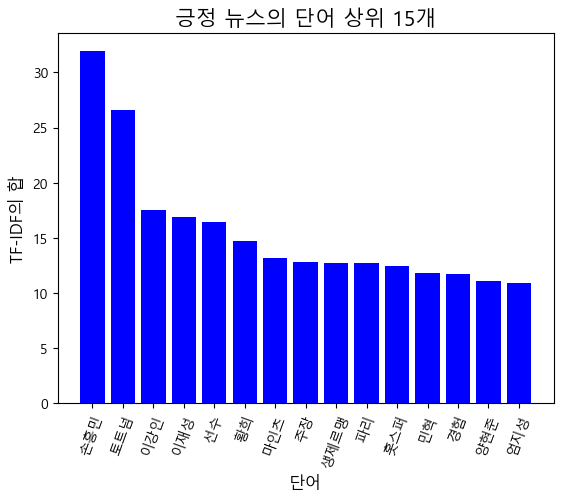

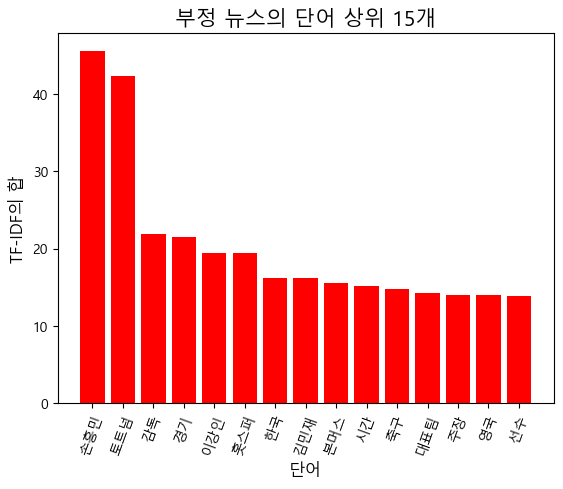

In [100]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm._get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 뉴스의 단어 상위 %d개" % max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [102]:
import gensim
import gensim.corpora as corpora

description = data_df["description"]
description_noun_tk = []
for d in description:
    description_noun_tk.append(okt.nouns(d))

description_noun_tk2 = []

for d in description_noun_tk:
    item = [i for i in d if len(i) > 1]
    description_noun_tk2.append(item)
dictionary = corpora.Dictionary(description_noun_tk2)
print(dictionary[1])
corpus = [dictionary.doc2bow(word) for word in description_noun_tk2]
print(corpus)

k = 4
lda_model = gensim.models.ldamulticore.LdaMulticore(corpus, iterations=12, num_topics=k, id2word=dictionary, passes=1,
                                                    workers=10)
print(lda_model.print_topics(num_topics=k, num_words=15))

import pickle
with open("lda_model.pkl", "wb") as f:
    pickle.dump(lda_model, f)

import pyLDAvis.gensim

lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
# lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, n_jobs=1)

거리
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(6, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)], [(6, 2), (18, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(2, 2), (6, 1), (18, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(6, 1), (18, 3), (54, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)], [(6, 1), (17, 1), (18, 1), (50, 1), (58, 1), (77, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (9

In [103]:
pyLDAvis.display(lda_vis)